# ML PROJECT-UNIVERSITY ADMISSION PREDICTION- PHASE 2
## SRUTHI SHYAM   AM.EN.U4CSE19055

## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

## Loading dataset

In [2]:
df=pd.read_csv("admissionOriginal.csv")
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


## PRE PROCESSING
## Removing unecessary column and summary of data

In [3]:
df = df.drop(columns="Serial No.") ##removed serial number column
df.describe().T

,count,mean,std,min,25%,50%,75%,max
GRE Score,400.0,316.807500,11.473646,290.00,308.00,317.00,325.0000,340.00
TOEFL Score,400.0,107.410000,6.069514,92.00,103.00,107.00,112.0000,120.00
University Rating,400.0,3.087500,1.143728,1.00,2.00,3.00,4.0000,5.00
SOP,400.0,3.400000,1.006869,1.00,2.50,3.50,4.0000,5.00
LOR,400.0,3.452500,0.898478,1.00,3.00,3.50,4.0000,5.00
CGPA,400.0,8.598925,0.596317,6.80,8.17,8.61,9.0625,9.92
Research,400.0,0.547500,0.498362,0.00,0.00,1.00,1.0000,1.00
Chance of Admit,400.0,0.724350,0.142609,0.34,0.64,0.73,0.8300,0.97


## Feature Scaling  and Data Splitting

In [5]:
data = df.values
# split into inputs and outputs
X=data[:,:-1]
y=data[:,-1]
print(X.shape, y.shape)
##standardization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(400, 7) (400,)
(320, 7) (80, 7) (320,) (80,)


## SUPERVISED ML ALGORITHMS USING SKLEARN BULIT IN FUNCTIONS

## Linear Regression

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score,mean_absolute_error
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train, y_train)
y_pred=linear_regression_model.predict(X_test)
lr=linear_regression_model.score(X_test,y_test)#r2 score 
print("R2 score: ",lr)
print("MAE: ",mean_absolute_error(y_test,y_pred))
print("MSE: ",mean_squared_error(y_test,y_pred))

R2 score:  0.8079043677020102
MAE:  0.04495779899577676
MSE:  0.004442679729994739


## Decision Tree

In [7]:
from sklearn.tree import DecisionTreeRegressor
decisionTree_model = DecisionTreeRegressor()
decisionTree_model.fit(X_train, y_train)
y_pred=decisionTree_model.predict(X_test)
dt=decisionTree_model.score(X_test, y_test)
print("R2 score: ",dt)
print("MAE: ",mean_absolute_error(y_test,y_pred))
print("MSE: ",mean_squared_error(y_test,y_pred))

R2 score:  0.628849932034191
MAE:  0.06537499999999999
MSE:  0.008583749999999998


## Random Forest

In [9]:
from sklearn.ensemble import RandomForestRegressor
randomForest_model = RandomForestRegressor(n_estimators=100, max_depth=10)
randomForest_model.fit(X_train, y_train)
y_pred=randomForest_model.predict(X_test)
rf=randomForest_model.score(X_test,y_test)
print("R2 score: ",rf)
print("MAE: ",mean_absolute_error(y_test,y_pred))
print("MSE: ",mean_squared_error(y_test,y_pred))

R2 score:  0.7721224553660675
MAE:  0.050435227713390395
MSE:  0.005270223671174733


## KNN

In [17]:
from sklearn.neighbors import KNeighborsRegressor
k=[3,5,7,9]
ks=[]
for i in k:
    model =KNeighborsRegressor(n_neighbors=i)
    model.fit(X_train, y_train)
    knn=model.score(X_test, y_test)
    ks.append(knn)
knn=max(ks)
print("R2 score: ",knn)

R2 score:  0.7868509281785026


In [19]:
model =KNeighborsRegressor(n_neighbors=7)
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
print("MAE: ",mean_absolute_error(y_test,y_pred))
print("MSE: ",mean_squared_error(y_test,y_pred))

MAE:  0.05007142857142856
MSE:  0.004929591836734694


### plot of performance for different values of k

Text(0.5, 1.0, 'K value Vs Performance')

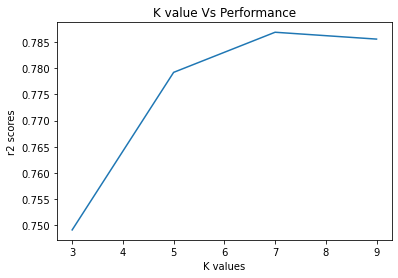

In [18]:
plt.plot(k,ks)
plt.xlabel('K values')
plt.ylabel('r2 scores')
plt.title('K value Vs Performance')

## Support Vector

In [21]:
from sklearn.svm import SVR
supportVector_model = SVR(kernel='linear')
supportVector_model.fit(X_train, y_train)
y_pred=supportVector_model.predict(X_test)
sv=supportVector_model.score(X_test,y_test)
print("R2 score:",sv)
print("MAE: ",mean_absolute_error(y_test,y_pred))
print("MSE: ",mean_squared_error(y_test,y_pred))

R2 score: 0.7483828250499446
MAE:  0.06503443713314819
MSE:  0.005819260487583972


## plot of performance for different ml algorithms

Text(0.5, 1.0, 'Algorithm Vs Performance')

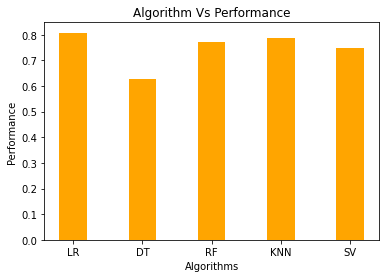

In [22]:
sc=[lr,dt,rf,knn,sv]
m=['LR','DT','RF','KNN','SV']
plt.bar(m,sc,color='orange',width=0.4)
plt.xlabel('Algorithms')
plt.ylabel('Performance')
plt.title('Algorithm Vs Performance')

Linear regression model gives the best performance so we will implement it from scratch.
The decreasing order of performance :Linear Regression,KNN,Random Forest,Support Vector and Decision Tree

## IMPLEMENTING LINEAR REGRESSION FROM SCRATCH

In [15]:
def CostFunction(x,y,w,b):
    cost = np.sum((((x.dot(w) + b) - y) ** 2) / (2*len(y)))
    return cost

In [16]:
#Gradient Descent
def GradientDescent(x, y, w, b, learning_rate, epochs):
    cost_list = [0] * epochs
   
    for epoch in range(epochs):
        z = x.dot(w) + b
        loss = z - y
        
        weight_gradient = x.T.dot(loss) / len(y)
        bias_gradient = np.sum(loss) / len(y)
        
        w = w - learning_rate*weight_gradient
        b = b - learning_rate*bias_gradient
  
        cost = CostFunction(x, y, w, b)
        cost_list[epoch] = cost
        
        if (epoch%(epochs/10)==0):
            print("Cost at epoch",epoch,"is:",cost)
        
    return w, b, cost_list

In [17]:
# Calculating weights and bias
w, b, c= GradientDescent(X_train, y_train, np.zeros(X_train.shape[1]), 0, 0.002,epochs=15000)

Cost at epoch 0 is: 0.27222401963159326
Cost at epoch 1500 is: 0.0026568298040170035
Cost at epoch 3000 is: 0.0019726725117303677
Cost at epoch 4500 is: 0.001956911436354154
Cost at epoch 6000 is: 0.001951350812774764
Cost at epoch 7500 is: 0.0019490940207929684
Cost at epoch 9000 is: 0.0019481583306738925
Cost at epoch 10500 is: 0.0019477654834906281
Cost at epoch 12000 is: 0.0019475992392871118
Cost at epoch 13500 is: 0.0019475285237009997


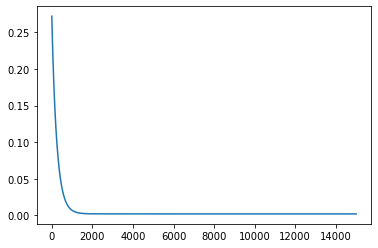

In [18]:
# Plotting the cost
plt.plot(c)

In [19]:
# Predicting labels with the calculated weights and biases
def predict(X, w, b):
    return X.dot(w) + b

In [20]:
y_pred = predict(X_test, w, b)

In [21]:
# Calculating the r² accuracy of our model
def r2score(y_pred, y):
    rss = np.sum((y_pred - y) ** 2)
    tss = np.sum((y-y.mean()) ** 2)
    
    r2 = 1 - (rss / tss)
    return r2

In [22]:
r2score(y_pred, y_test)

0.8079073825829807

## K FOLD CROSS VALIDATION ON DIFFERENT ML ALGORITHMS

LR: 0.789368 
RF: 0.744012 
KNN: 0.748457 
SV: 0.682314 
DT: 0.535563 


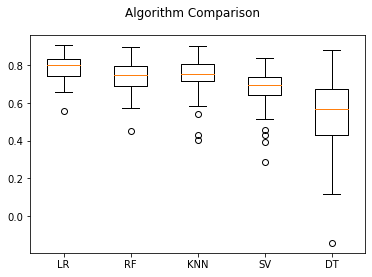

In [29]:
from sklearn import model_selection
# prepare models
models = []
models.append(('LR', LinearRegression()))
models.append(('RF', RandomForestRegressor()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('SV',SVR()))
models.append(('DT', DecisionTreeRegressor()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = model_selection.RepeatedKFold(n_splits=10)
	cv_results = model_selection.cross_val_score(model, X, y, cv=kfold)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f " % (name, cv_results.mean())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()